## setting up and importing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [6]:
house = pd.read_csv('data/residential property price index quarterly.csv')
sales = pd.read_csv('data/mean sale price monthly.csv')
wage = pd.read_csv('data/earnings data quarterly.csv')
rent = pd.read_csv('data/one bed dublin rents quarterly.csv')

cpi = pd.read_csv('data/CPI excluding housing.csv')
rent = pd.read_csv('data/one bed dublin rents quarterly.csv')
starts = pd.read_csv('data/housing starts.csv')

### setting month columns to datetime

In [7]:
quarter_to_month = {'1':'01', '2':'04', '3':'07', '4':'10'}

#splitting out string to get year and quarter
rent[['Year', 'Quarter']] = rent['Quarter'].str.split('Q', expand=True)
rent['Month'] = rent['Year'].astype(str) + '-' + rent['Quarter'].map(quarter_to_month) +'-01'

rent['Month'] = pd.to_datetime(rent['Month'])

house['Quarter'] = pd.to_datetime(house['Quarter'])
wage['Quarter'] = pd.to_datetime(wage['Quarter'])
starts['Month'] = pd.to_datetime(starts['Month'], format='%Y %B')
cpi['Month'] = pd.to_datetime(cpi['Month'], format='%Y %B')

homeless = pd.DataFrame({'year':[2011,2016,2022], 
                         'homeless':[3808, 6906, 10321]})
homeless['year'] = pd.to_datetime(homeless['year'], format='%Y')

In [8]:
#trimming the data to start at Q1 2012

cutoff = pd.to_datetime('2012-01-01')

house = house[house['Quarter'] >= cutoff]
wage = wage[wage['Quarter'] >= cutoff]
rent = rent[rent['Month'] >= cutoff]
cpi = cpi[cpi['Month'] >= cutoff]
starts = starts[starts['Month'] >= cutoff]

house.reset_index(drop=True, inplace=True)
wage.reset_index(drop=True, inplace=True)
rent.reset_index(drop=True, inplace=True)
cpi.reset_index(drop=True, inplace=True)
starts.reset_index(drop=True, inplace=True)

In [9]:
#rebasing wages to 100 at Q1 2015
rebase_factor = 100 / wage['VALUE'][0]
wage['VALUE_REBASED'] = wage['VALUE'] * rebase_factor

#rebasing rent to 100 at Q1 2015
rebase_factor = 100 / rent['VALUE'][0]
rent['VALUE_REBASED'] = rent['VALUE'] * rebase_factor

rebase_factor = 100 / house['VALUE'][0]
house['VALUE_REBASED'] = house['VALUE'] *rebase_factor

rebase_factor = 100 / cpi['VALUE'][0]
cpi['VALUE_REBASED'] = cpi['VALUE'] * rebase_factor

rebase_factor = 100 / homeless['homeless'][0]
homeless['homeless_rebased'] = homeless['homeless'] * rebase_factor

rebase_factor = 100 / starts['VALUE'][0]
starts['VALUE_REBASED'] = starts['VALUE'] * rebase_factor

In [417]:
starts.head()

,Statistic Label,Month,Residential Units Commenced,Local Authority,UNIT,VALUE,VALUE_REBASED
0,Commencement Notices,2014-03-01,Number of residential units,Ireland,Number,2,100.0
1,Commencement Notices,2014-04-01,Number of residential units,Ireland,Number,83,4150.0
2,Commencement Notices,2014-05-01,Number of residential units,Ireland,Number,79,3950.0
3,Commencement Notices,2014-06-01,Number of residential units,Ireland,Number,217,10850.0
4,Commencement Notices,2014-07-01,Number of residential units,Ireland,Number,326,16300.0



Bad key text.alpha in file ../graph_style.mplstyle, line 47 ('text.alpha: 0.5')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


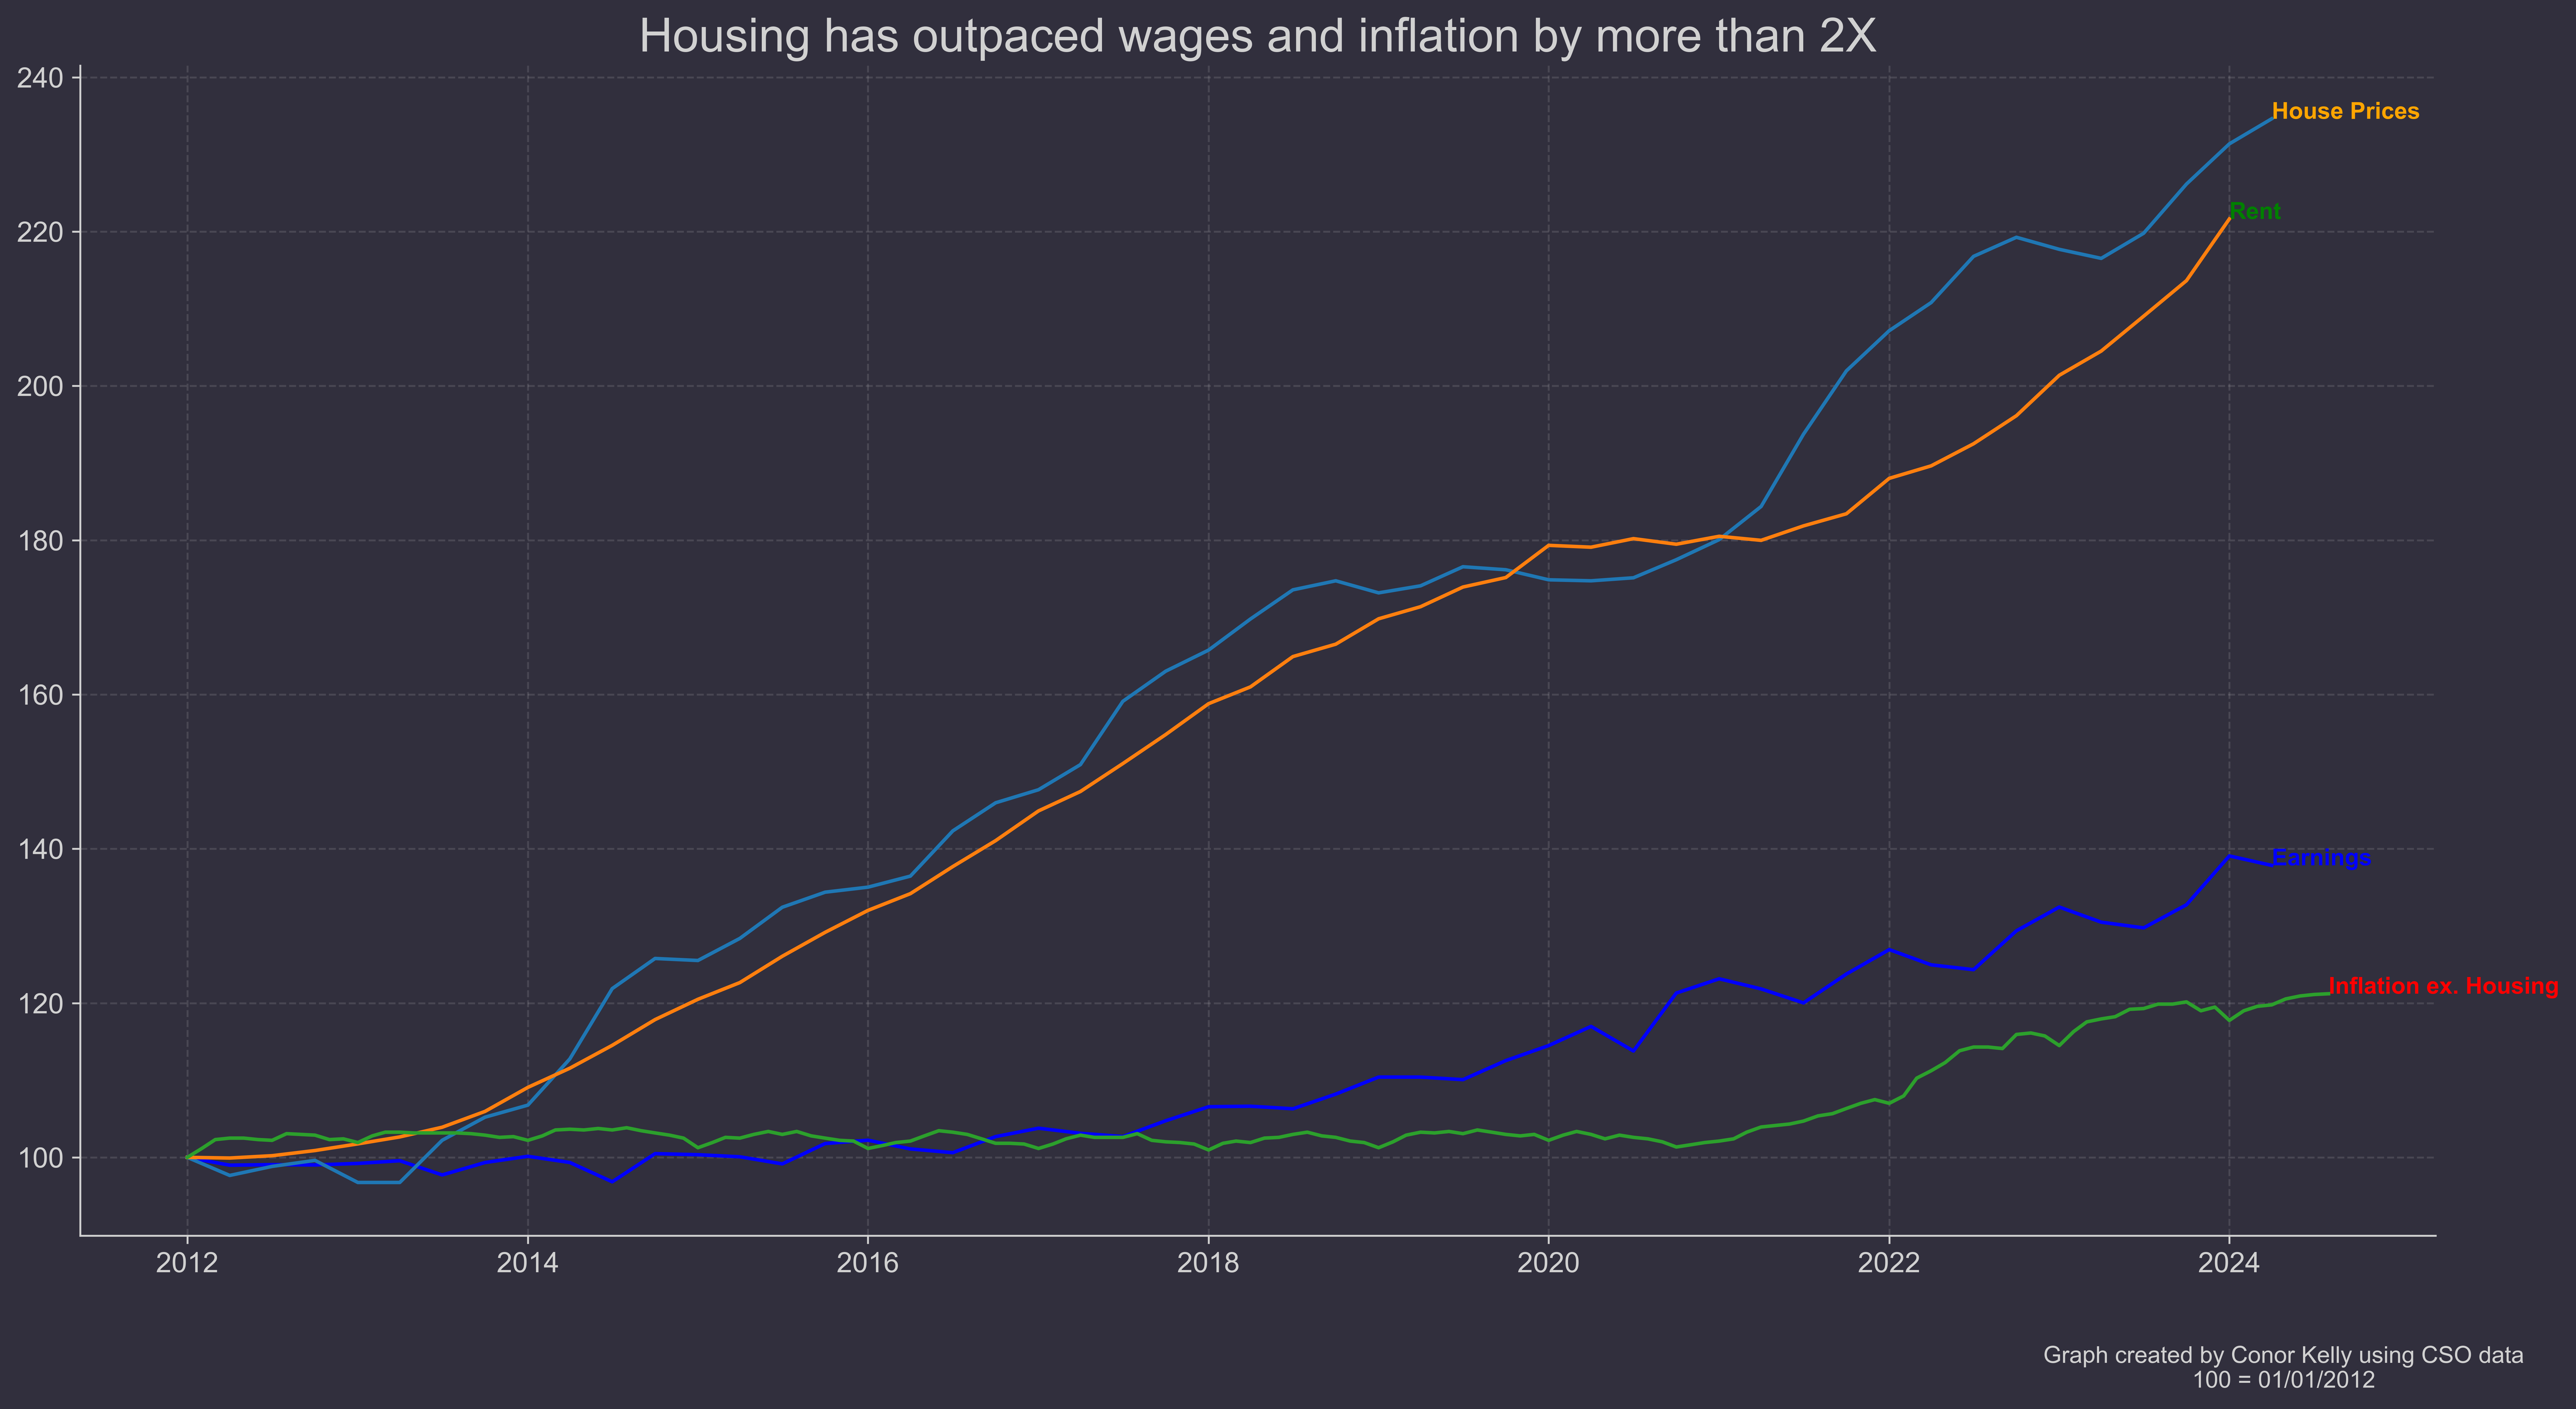

In [33]:



plt.style.use('../graph_style.mplstyle')

fig, ax = plt.subplots( figsize=(18, 9))
#fig.set_facecolor('lightgrey')
#ax.set_facecolor('lightgrey')
#ax.spines[['top','right']].set_visible(False)

#ax.grid(True, color='white',  linewidth=1, alpha=0.3)

ax.plot(wage['Quarter'] , wage['VALUE_REBASED'], label='Earnings', linewidth = 1.5, color='blue')
ax.plot(house ['Quarter'], house['VALUE_REBASED'], label='House Prices', linewidth = 1.5)
ax.plot(rent['Month'], rent['VALUE_REBASED'], label='Rent', linewidth = 1.5)
ax.plot(cpi['Month'], cpi['VALUE_REBASED'], label='Inflation ex. Housing', linewidth = 1.5)
#ax.plot(homeless['year'], homeless['homeless_rebased'], label='Homeless', linewidth = 2)
#ax.plot(starts['Month'], starts['VALUE_REBASED'], label='Housing Starts', linewidth = 2)

ax.set_title('Housing has outpaced wages and inflation by more than 2X')


#annotating lines
ax.text(wage['Quarter'].iloc[-1], wage['VALUE_REBASED'].iloc[-1], 'Earnings', fontdict={'color':'blue', 'weight':'bold'})
ax.text(house['Quarter'].iloc[-1], house['VALUE_REBASED'].iloc[-1], 'House Prices', fontdict={'color':'orange', 'weight':'bold'})
ax.text(rent['Month'].iloc[-1], rent['VALUE_REBASED'].iloc[-1], 'Rent', fontdict={'color':'green', 'weight':'bold'})
ax.text(cpi['Month'].iloc[-1], cpi['VALUE_REBASED'].iloc[-1], 'Inflation ex. Housing', fontdict={'color':'red', 'weight':'bold'})

fig.text(0.85, 0.01, 'Graph created by Conor Kelly using CSO data\n100 = 01/01/2012', ha='center', fontsize=10)

#plt.getp(ax,'children')
ax.get_children()
plt.show()

#fig.savefig('figure.png', dpi=1000)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sales_q['VALUE'], label='Mean Sale Price')
ax.plot(wage['VALUE']*52, label='wages')
ax.plot(wage['VALUE']*52*4, label = '4x wages')
plt.show()

## Smoothing values


In [ ]:
# Function to compute moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Apply moving average with a window size of 5
sales_q['Smoothed'] = moving_average(sales_q['VALUE'], 5)
house['Smoothed'] = moving_average(house['VALUE'], 5)
wage['Smoothed'] = moving_average(wage['VALUE'], 5)
rent['Smoothed'] = moving_average(rent['VALUE'], 5)


In [ ]:
house.drop([0, 1], axis=0, inplace=True)
house.reset_index(drop=True, inplace=True)

wage.drop([0, 1], axis=0, inplace=True)
wage.reset_index(drop=True, inplace=True)

sales_q.drop([0, 1], axis=0, inplace=True)
sales_q.reset_index(drop=True, inplace=True)

rent.drop([0, 1], axis=0, inplace=True)
rent.reset_index(drop=True, inplace=True)

house.drop(house.index[-2:], inplace=True)
wage.drop(wage.index[-2:], inplace=True)
sales_q.drop(sales_q.index[-2:], inplace=True)
rent.drop(rent.index[-2:], inplace=True)

len(house), len(wage), len(sales_q)

In [ ]:
fig, ax = plt.subplots()
ax.plot(sales_q['Month'], sales_q['Smoothed'], label='Mean Sale Price')
ax.plot( wage['Quarter'], wage['Smoothed']*52*2*4,label = '4x wages, dual mean earnings')
ax.plot(wage['Quarter'], wage['Smoothed']*52*4, label='4x wages, single earner')
plt.show()

In [ ]:
rent

In [ ]:
936*52
